In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
population = pd.read_csv("Population.csv")
CO2 = pd.read_csv("C02_emmision_solid_fuel.csv")

In [4]:
# Q3


temp = CO2.set_index("Country Name")


max_year_sum = -1
max__year = -1


for column in temp.columns[4:]:
    year_sum = sum(temp.loc[["India" , "United States" , "United Kingdom" , "China" , "France"]][column])
    if year_sum > max_year_sum:
        max_year_sum = year_sum
        max__year = column


max__year


'2014'

In [5]:
# Q4


sum_2016 = sum(CO2['2016'])


CO2['weights'] = (CO2['2016'] * 100) / sum_2016
CO2.sort_values(by='weights', ascending=False)[:5][['Country Name' , 'weights']]



,Country Name,weights
0,Aruba,NaN
1,Afghanistan,NaN
2,Angola,NaN
3,Albania,NaN
4,Andorra,NaN


In [6]:
count = 0
for column in CO2.columns:
    if pd.isna(CO2[column]).sum() == CO2.shape[0] :
        count += 1
count
# Remove columns with no data entry for further processing.
for column in CO2.columns:
    if pd.isna(CO2[column]).sum() == CO2.shape[0] :
        CO2.drop([column], axis=1)
       
# Replace NaN entries with zero
CO2 = CO2.fillna(0)


# Drop the countries with all entries zero.
for i in range(CO2.shape[1]):
    if sum(CO2.iloc[i][4:]) == 0:
        CO2 = CO2.drop([CO2.index[i]])
       
CO2 = CO2.reset_index()


CO2


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,weights
0,1,Afghanistan,AFG,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,128.345,176.016,297.027,264.024,300.694,...,3942.025,4378.398,3975.028,4829.439,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Angola,AGO,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,124.678,62.339,91.675,22.002,77.007,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Albania,ALB,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,326.363,322.696,363.033,282.359,333.697,...,550.050,700.397,227.354,14.668,0.0,0.0,0.0,0.0,0.0,0.0
3,5,Arab World,ARB,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,6,United Arab Emirates,ARE,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,0.000,0.000,0.000,0.000,0.000,...,6710.610,7484.347,6501.591,6985.635,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,214,Kosovo,XKX,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,0.000,0.000,0.000,0.000,0.000,...,6149.559,5357.487,6156.893,6673.940,0.0,0.0,0.0,0.0,0.0,0.0
196,215,"Yemen, Rep.",YEM,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,0.000,0.000,0.000,0.000,0.000,...,495.045,495.045,355.699,322.696,0.0,0.0,0.0,0.0,0.0,0.0
197,216,South Africa,ZAF,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,87512.955,90545.564,93336.151,96680.455,102635.663,...,392644.025,412746.519,386773.158,399603.991,0.0,0.0,0.0,0.0,0.0,0.0
198,217,Zambia,ZMB,CO2 emissions from solid fuel consumption (kt),EN.ATM.CO2E.SF.KT,0.000,0.000,0.000,0.000,2753.917,...,458.375,484.044,484.044,854.411,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
temp = CO2[['Country Name' , '2012']].set_index("Country Name")
sum(temp.loc[["India" , "United States" , "United Kingdom" , "China" , "France"]]['2012'])/5


2129772.3314000005

In [8]:
# Q5
temp = CO2[:]
pop_temp = population[['Country Name' , '2016']].set_index('Country Name')
weights_per_person = []


for i in range(CO2.shape[0]):
    weights_per_person.append(float (CO2.iloc[i]['2016'] / pop_temp.loc[CO2.iloc[i]['Country Name']] ))
   


sum_weights_per_person = sum(weights_per_person)


weights_per_person = np.array(weights_per_person)


CO2['weights_per_person'] = (weights_per_person *  100) / sum_weights_per_person
CO2.sort_values(by='weights_per_person', ascending=False)[:5][['Country Name' , 'weights_per_person']]


,Country Name,weights_per_person
47,Estonia,6.337322
122,New Caledonia,5.543306
114,Mongolia,4.458263
81,Kazakhstan,4.445041
8,Australia,4.354158


/var/folders/jh/h8sdq7wd2gg3pb1y528l75m80000gn/T/ipykernel_14457/3178891713.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=temp.columns, rotation=90)


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'CO2 emission (1e6)')]

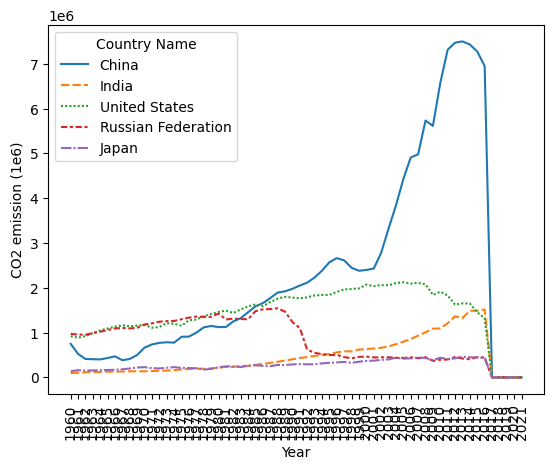

In [10]:
t = CO2.set_index("Country Name")
t = t.loc[["China", "India","United States", "Russian Federation", "Japan"]]
t = t.drop(['index' , 'Country Code' ,'Indicator Name' , 'Indicator Code' , 'weights' , 'weights_per_person'], axis=1)




g = sns.lineplot(data = t.T )
g.set_xticklabels(labels=t.columns, rotation=90)
g.set(xlabel='Year', ylabel='CO2 emission (1e6)')
